In [165]:
import pandas as pd
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [167]:
data = pd.read_csv("large_sentiment_dataset.csv")
data.head()


,review,sentiment
0,Waste of money,Negative
1,Outstanding service and fast delivery,Positive
2,Best product I have ever used,Positive
3,Fantastic quality and performance,Positive
4,"Loved it, exceeded my expectations",Positive


In [169]:
# Convert to string
data["sentiment"] = data["sentiment"].astype(str)

# Clean text
data["sentiment"] = data["sentiment"].str.strip().str.lower()

# Keep only valid labels
data = data[data["sentiment"].isin(["positive", "negative"])]

# Drop NaN if any
data = data.dropna().reset_index(drop=True)

print(data["sentiment"].value_counts())


sentiment
negative    5000
positive    5000
Name: count, dtype: int64


In [171]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

data["clean_review"] = data["review"].apply(clean_text)


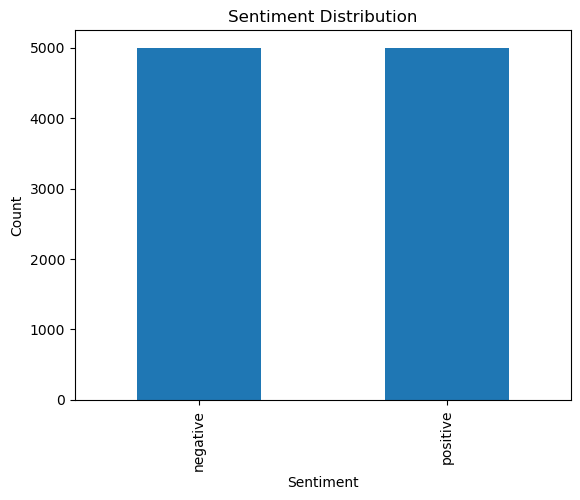

In [173]:
data["sentiment"].value_counts().plot(kind="bar")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [175]:
X = data["clean_review"]
y = data["sentiment"]

print("NaN in y:", y.isnull().sum())


NaN in y: 0


In [177]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [179]:
tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=5000
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [181]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [183]:
y_pred = model.predict(X_test_tfidf)


In [185]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1000
    positive       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



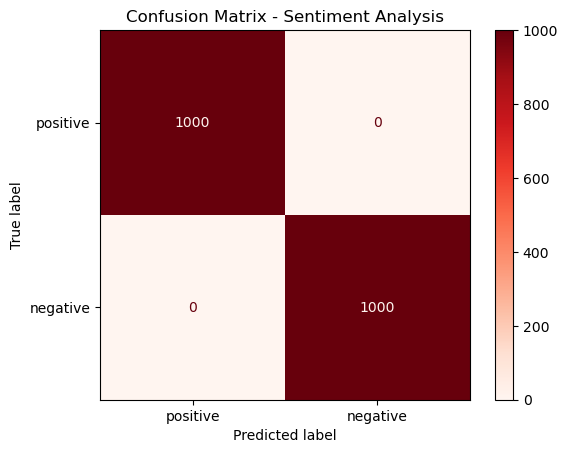

In [187]:
cm = confusion_matrix(y_test, y_pred, labels=["positive", "negative"])

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["positive", "negative"]
)

disp.plot(cmap="Reds")
plt.title("Confusion Matrix - Sentiment Analysis")
plt.show()
